In [1]:
%matplotlib inline

In [37]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Data Cleaning and Preprocessing and EDA

## Of Asthma Disease Dataset

In this notebook, we will preprocess the data we have already got familiar with in the 'Data Exploration' notebook.  

## 1. Data Cleaning and Preprocessing

Here's the information about the dataset:

### Patient Information
#### Patient ID
PatientID: A unique identifier assigned to each patient (5034 to 7425).
#### Demographic Details
Age: The age of the patients ranges from 5 to 80 years.

Gender: Gender of the patients, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the patients, coded as follows:

0: Caucasian

1: African American

2: Asian

3: Other

EducationLevel: The education level of the patients, coded as follows:

0: None

1: High School

2: Bachelor's

3: Higher

#### Lifestyle Factors
BMI: Body Mass Index of the patients, ranging from 15 to 40.

Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.

PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.

DietQuality: Diet quality score, ranging from 0 to 10.

SleepQuality: Sleep quality score, ranging from 4 to 10.

#### Environmental and Allergy Factors
PollutionExposure: Exposure to pollution, score from 0 to 10.

PollenExposure: Exposure to pollen, score from 0 to 10.

DustExposure: Exposure to dust, score from 0 to 10.

PetAllergy: Pet allergy status, where 0 indicates No and 1 indicates Yes.

#### Medical History
FamilyHistoryAsthma: Family history of asthma, where 0 indicates No and 1 indicates Yes.

HistoryOfAllergies: History of allergies, where 0 indicates No and 1 indicates Yes.

Eczema: Presence of eczema, where 0 indicates No and 1 indicates Yes.

HayFever: Presence of hay fever, where 0 indicates No and 1 indicates Yes.

GastroesophagealReflux: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Yes.
#### Clinical Measurements
LungFunctionFEV1: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.

LungFunctionFVC: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.

#### Symptoms
Wheezing: Presence of wheezing, where 0 indicates No and 1 indicates Yes.

ShortnessOfBreath: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.

ChestTightness: Presence of chest tightness, where 0 indicates No and 1 indicates Yes.

Coughing: Presence of coughing, where 0 indicates No and 1 indicates Yes.

NighttimeSymptoms: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes.

ExerciseInduced: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicates Yes.
#### Diagnosis Information
Diagnosis: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.

In [11]:
asthma_data = pd.read_csv("https://raw.githubusercontent.com/ShopyEsladuk/Asthma-Diagnosis/main/data/asthma_disease_data.csv")

In [15]:
asthma_data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [17]:
asthma_data.DoctorInCharge.unique()

array(['Dr_Confid'], dtype=object)

In [104]:
# Only one value is not useful
asthma_data_preprocessed = asthma_data.drop(columns = ["DoctorInCharge"])

In [93]:
asthma_data_preprocessed.dtypes

PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
dtype: object

The dtypes LGTM. Especially considering the fact we need only floating points in Problem 5. Now we will see if there are any outliers, missing or wrong data based on the description of the dataset.

In [115]:
asthma_data_preprocessed.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2392.0,6229.500000,690.655244,5034.000000,5631.750000,6229.500000,6827.250000,7425.000000
Age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
Gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
Smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
DietQuality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
SleepQuality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235


I cannot spot any outliers as of now.

In [127]:
# column names preprocessing

def split_words(column):
    return "_".join(re.findall(r'[A-Z][^A-Z]*', column))

In [131]:
asthma_data_preprocessed.columns = [split_words(column) for column in asthma_data_preprocessed.columns]

In [137]:
asthma_data_preprocessed.columns = asthma_data_preprocessed.columns.str.lower()

In [139]:
asthma_data_preprocessed.columns

Index(['patient_i_d', 'age', 'gender', 'ethnicity', 'education_level', 'b_m_i',
       'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
       'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
       'family_history_asthma', 'history_of_allergies', 'eczema', 'hay_fever',
       'gastroesophageal_reflux', 'lung_function_f_e_v1',
       'lung_function_f_v_c', 'wheezing', 'shortness_of_breath',
       'chest_tightness', 'coughing', 'nighttime_symptoms', 'exercise_induced',
       'diagnosis'],
      dtype='object')

In [143]:
asthma_data_preprocessed = asthma_data_preprocessed.rename(
    columns = {
        "patient_i_d" : "patient_id",
        'b_m_i' : 'bmi',
        'lung_function_f_e_v1' : 'lung_function_fev1',
        'lung_function_f_v_c' : 'lung_function_fvc',
    }
)

In [151]:
asthma_data_preprocessed.columns

Index(['patient_id', 'age', 'gender', 'ethnicity', 'education_level', 'bmi',
       'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
       'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
       'family_history_asthma', 'history_of_allergies', 'eczema', 'hay_fever',
       'gastroesophageal_reflux', 'lung_function_fev1', 'lung_function_fvc',
       'wheezing', 'shortness_of_breath', 'chest_tightness', 'coughing',
       'nighttime_symptoms', 'exercise_induced', 'diagnosis'],
      dtype='object')

## 2. EDA

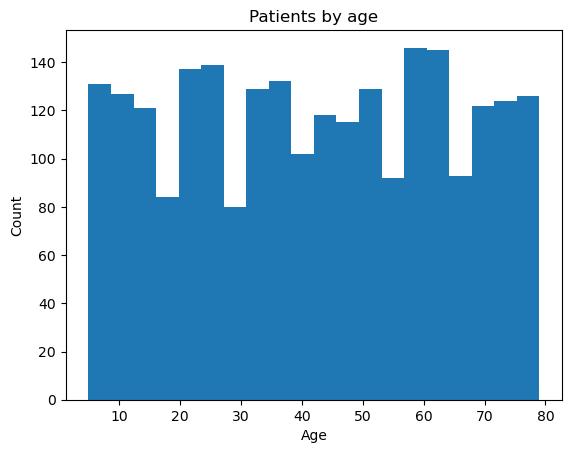

In [178]:
plt.hist(asthma_data_preprocessed.age, bins = 20)
plt.title("Patients by age")
plt.ylabel("Count")
plt.xlabel("Age")
plt.show()

The dataset is, let's say, evenly distributed when it comes to ages. What I mean, there are too many young, mid-age, or old patients.

In [164]:
asthma_data_preprocessed.gender.value_counts()

gender
0    1212
1    1180
Name: count, dtype: int64

'0' stands for male and '1' for female (we have not replaced them with the words 'male' or 'female' because it is stated in Problem 5 there should be only floating-point values).

In [167]:
asthma_data_preprocessed.diagnosis.value_counts()

diagnosis
0    2268
1     124
Name: count, dtype: int64

There are not that many patients with asthma compared to the ones without.

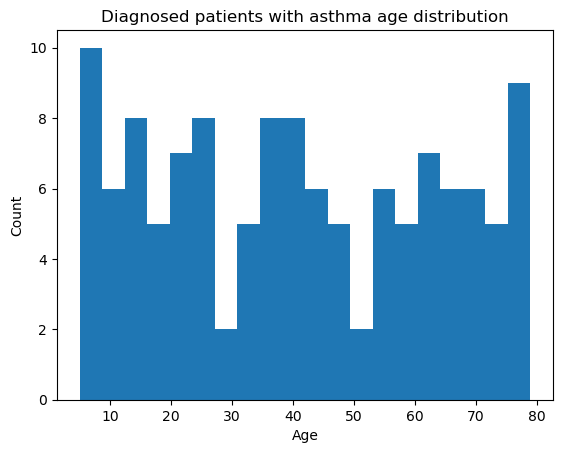

In [176]:
plt.hist(asthma_data_preprocessed[asthma_data_preprocessed.diagnosis == 1].age, bins = 20)
plt.title("Diagnosed patients with asthma age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

There seem to be some really young patients with asthma. Anyway, excluding this fact, the distribution seems to be quite even.

In [192]:
print("Patients with history of family members with asthma vs Amount of them with asthma")
len(
    asthma_data_preprocessed[asthma_data_preprocessed.family_history_asthma == 1]
), len(
    asthma_data_preprocessed[
    (asthma_data_preprocessed.family_history_asthma == 1)
    &
    (asthma_data_preprocessed.diagnosis == 1)
    ]
)

Patients with history of family members with asthma vs Amount of them with asthma


(720, 37)

At first look, there does not seem to be connection with genes. Let's go into a bit more detail

In [201]:
print("% of asthma patients with history of asthma in the family vs % of asthma patients with no history")
len(
    asthma_data_preprocessed[
    (asthma_data_preprocessed.family_history_asthma == 1)
    &
    (asthma_data_preprocessed.diagnosis == 1)
    ]
) / 124 * 100, len(
    asthma_data_preprocessed[
    (asthma_data_preprocessed.family_history_asthma == 0)
    &
    (asthma_data_preprocessed.diagnosis == 1)
    ]
) / 124 * 100

% of asthma patients with history of asthma in the family vs % of asthma patients with no history


(29.838709677419356, 70.16129032258065)

In [209]:
print("% of observed patients with history of asthma in the family vs % of observed patients with no history")
len(asthma_data_preprocessed[asthma_data_preprocessed.family_history_asthma == 1]) / len(asthma_data_preprocessed) * 100, len(asthma_data_preprocessed[asthma_data_preprocessed.family_history_asthma == 0]) / len(asthma_data_preprocessed) * 100

% of observed patients with history of asthma in the family vs % of observed patients with no history


(30.100334448160538, 69.89966555183946)

Yeah, I do not think history of family member with asthma matters

In [222]:
asthma_data_preprocessed.to_csv("data/asthma_data_preprocessed.csv", index = False)